In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
df = pd.read_csv('socialmobility.csv')
df

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


There are 16 categories, we can start with uniform Dirichlet distribution over $\vec{p}$ with $\vec{\alpha} = (1, \cdots, 1)$.

$$Dirichlet(p_{1}, p_{2}, \cdots, p_{16}) | (1, 1, \cdots, 1)$$

Given that info, we know that the Dirichlet distribution is a conjugate prior for our Multinomial distribution. Therefore the posterior is also a Dirichlet distribution. 
The new alpha is given as $\vec{\alpha_{p\text{post}}} = \vec{\alpha_{\text{prior}}} + \vec{x}$

In [3]:
df['posterior'] = df['count'] + 1
df

,father,son,count,posterior
0,farm,farm,703,704
1,farm,unskilled,1478,1479
2,farm,skilled,1430,1431
3,farm,professional,1109,1110
4,unskilled,farm,58,59
5,unskilled,unskilled,1756,1757
6,unskilled,skilled,1630,1631
7,unskilled,professional,1568,1569
8,skilled,farm,63,64
9,skilled,unskilled,1453,1454


In [4]:
df.loc[df['father'] == 'unskilled']

,father,son,count,posterior
4,unskilled,farm,58,59
5,unskilled,unskilled,1756,1757
6,unskilled,skilled,1630,1631
7,unskilled,professional,1568,1569


The `unskilled_skilled` category with index 6 at position 2 represents the situation whereby the father was unskilled and their son was skilled. To calculate the 95% probability of this situaion we use `numpy`.

In [5]:
samples_1 = sts.dirichlet.rvs(list(df.loc[df['father'] == 'unskilled']['posterior']), size=10000)
samples_1

array([[0.01192244, 0.35672541, 0.3194257 , 0.31192646],
       [0.01115063, 0.35264755, 0.33128826, 0.30491356],
       [0.01292627, 0.35863527, 0.3192386 , 0.30919987],
       ...,
       [0.01231596, 0.35387447, 0.33022291, 0.30358667],
       [0.01321738, 0.35456109, 0.32057081, 0.31165072],
       [0.01228993, 0.34658378, 0.32651283, 0.31461346]])

Getting only the `farm` values whereby the father was a farmer. The index of when the child is `skilled` is 2. Therefore we would calculate the dirichlet of index 2.

In [6]:
percentiles = np.percentile(samples_1[:, 2], [0.025, 0.975])

print(f"95% confidence interval = {percentiles}")

95% confidence interval = [0.30321178 0.30987934]


Doing the same thing for a father that works on the farm and their son works as a professional `farm_professional` index 3

In [7]:
df.loc[df['father'] == 'farm']

,father,son,count,posterior
0,farm,farm,703,704
1,farm,unskilled,1478,1479
2,farm,skilled,1430,1431
3,farm,professional,1109,1110


In [8]:
samples_2 = sts.dirichlet.rvs(list(df.loc[df['father'] == 'farm']['posterior']), size=10000)
samples_2

array([[0.1507936 , 0.31243445, 0.30106124, 0.23571071],
       [0.15817641, 0.30321613, 0.29953972, 0.23906774],
       [0.14971933, 0.31395435, 0.29954587, 0.23678045],
       ...,
       [0.14175621, 0.3098878 , 0.31077549, 0.2375805 ],
       [0.13814244, 0.31452136, 0.30919187, 0.23814433],
       [0.13771116, 0.3210687 , 0.30928288, 0.23193726]])

In [9]:
percentiles = np.percentile(samples_2[:, 3],  [0.025, 0.975])

print(f"95% confidence interval = {percentiles}")

95% confidence interval = [0.21173129 0.22087539]


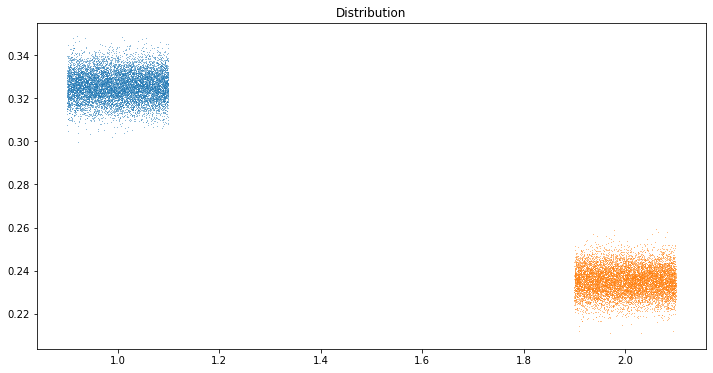

In [10]:
to_plot = []
samples = [samples_1[:, 2], samples_2[:, 3]]
plt.figure(figsize=(12, 6))
for i in range(2):
    y = samples[i]
    plt.plot(sts.uniform.rvs(loc=i+1-0.1, scale=0.2, size=len(y)), y, ',', alpha=0.5)
plt.title('Distribution')
plt.show()